In [45]:
%%capture
%pip install tensorflow pandas

Подключение библиотек:

In [46]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [47]:
# Максимальное количество слов 
num_words = 10000
# Максимальная длина сообщения
max_messages_len = 30
# Количество классов сообщений
nb_classes = 6

In [49]:
# import csv
# with open('val.txt', 'r') as in_file:
#     stripped = (line.strip() for line in in_file)
#     lines = (line.split(",") for line in stripped if line)
#     with open('val.csv', 'w') as out_file:
#         writer = csv.writer(out_file)
#         writer.writerows(lines)

Считываем данные из файла для тренировки создаваемой модели нейросети:

In [50]:
train = pd.read_csv('train.csv',
                    sep = ';',
                    header=None, 
                    names=['text', 'class'])

In [51]:
train

,text,class
0,i didnt feel humiliated,1
1,i can go from feeling so hopeless to so damned...,1
2,im grabbing a minute to post i feel greedy wrong,4
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,4
...,...,...
15995,i just had a very brief time in the beanbag an...,1
15996,i am now turning and i feel pathetic that i am...,1
15997,i feel strong and good overall,2
15998,i feel like this was such a rude comment and i...,4


Выделяем для обучения столбец 'text'

In [52]:
messages = train['text']

In [53]:
messages[:5]

0                              i didnt feel humiliated
1    i can go from feeling so hopeless to so damned...
2     im grabbing a minute to post i feel greedy wrong
3    i am ever feeling nostalgic about the fireplac...
4                                 i am feeling grouchy
Name: text, dtype: object

Далее выделяем правильные ответы из столбца 'class'

In [54]:
y_train = utils.to_categorical(train['class'] - 1, nb_classes)
y_train

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

Далее идет токенизация текста(представление текста в числовом формате, так как с числами работать проще), используется токенизатор из библиотеки Keras

In [55]:
tokenizer = Tokenizer(num_words=num_words)

Обучаем токенизатор на столбце с сообщении из датасета:

In [56]:
tokenizer.fit_on_texts(messages)

Далее можно посмотреть словарь слов с присвоенными каждому слову числовым значением

In [57]:
tokenizer.word_index

{'i': 1,
 'feel': 2,
 'and': 3,
 'to': 4,
 'the': 5,
 'a': 6,
 'feeling': 7,
 'that': 8,
 'of': 9,
 'my': 10,
 'in': 11,
 'it': 12,
 'like': 13,
 'so': 14,
 'for': 15,
 'im': 16,
 'me': 17,
 'but': 18,
 'was': 19,
 'have': 20,
 'is': 21,
 'this': 22,
 'am': 23,
 'with': 24,
 'not': 25,
 'about': 26,
 'be': 27,
 'as': 28,
 'on': 29,
 'you': 30,
 'just': 31,
 'at': 32,
 'when': 33,
 'or': 34,
 'all': 35,
 'because': 36,
 'more': 37,
 'do': 38,
 'can': 39,
 'really': 40,
 'up': 41,
 't': 42,
 'are': 43,
 'by': 44,
 'very': 45,
 'know': 46,
 'been': 47,
 'if': 48,
 'out': 49,
 'myself': 50,
 'time': 51,
 'how': 52,
 'what': 53,
 'get': 54,
 'little': 55,
 'had': 56,
 'now': 57,
 'will': 58,
 'from': 59,
 'being': 60,
 'they': 61,
 'people': 62,
 'them': 63,
 'would': 64,
 'he': 65,
 'want': 66,
 'her': 67,
 'some': 68,
 'think': 69,
 'one': 70,
 'still': 71,
 'ive': 72,
 'him': 73,
 'even': 74,
 'who': 75,
 'an': 76,
 'life': 77,
 'its': 78,
 'make': 79,
 'there': 80,
 'we': 81,
 'bit': 82

In [58]:
sequences = tokenizer.texts_to_sequences(messages)


Далее посмотрим как будет выглядеть рандомное сообщение в виде набора чисел:

In [59]:
index = 1
print(messages[index])
print(sequences[index])

i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake
[1, 39, 100, 59, 7, 14, 493, 4, 14, 3495, 552, 31, 59, 60, 127, 147, 75, 1479, 3, 21, 1254]


Далее ограничивается длина сообщений для тренировки(30 слов), если количество слов меньше 30, то сообщение записывается с конца, а оставшееся место заполняется нулями.

In [60]:
x_train = pad_sequences(sequences, maxlen=max_messages_len)

In [61]:
x_train[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    1,  138,    2,  678],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    1,   39,
         100,   59,    7,   14,  493,    4,   14, 3495,  552,   31,   59,
          60,  127,  147,   75, 1479,    3,   21, 1254],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,   16, 3059,
           6, 1148,    4,  285,    1,    2,  494,  437],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    1,   23,  164,    7,  664,   26,    5, 4157,    1,   58,
          46,    8,   12,   21,   71,   29,    5, 3496],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0, 

Далее создадим нейронную сеть(сверточную, библиотека Keras)

In [62]:
model_cnn = Sequential()
model_cnn.add(Embedding(num_words, 32, input_length=max_messages_len))
model_cnn.add(Conv1D(250, 5, padding='valid', activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(6, activation='softmax'))

In [63]:
model_cnn.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [64]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 32)            320000    
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 250)           40250     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 250)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 128)               32128     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                                 
Total params: 393,152
Trainable params: 393,152
Non-trainable params: 0
________________________________________________

Далее прописываем название файла, в котором будет сохранена лучшая из получившихся моделей, в дальнейшем можно будет выгружать из этого файла готовую модель('best_model_cnn.h5')

In [65]:
model_cnn_save_path = 'best_model_cnn.h5'
checkpoint_callback_cnn = ModelCheckpoint(model_cnn_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

Далее обучаем нашу нейронную сеть и сохраним модель в файле 'best_model_cnn.h5'

In [66]:
history_cnn = model_cnn.fit(x_train, 
                            y_train, 
                            epochs=5,
                            batch_size=128,
                            validation_split=0.1,
                            callbacks=[checkpoint_callback_cnn])

Epoch 1/5
113/113 [==============================] - ETA: 0s - loss: 1.5406 - accuracy: 0.3917
Epoch 1: val_accuracy improved from -inf to 0.58438, saving model to best_model_cnn.h5
113/113 [==============================] - 9s 35ms/step - loss: 1.5406 - accuracy: 0.3917 - val_loss: 1.1778 - val_accuracy: 0.5844
Epoch 2/5
112/113 [============================>.] - ETA: 0s - loss: 0.7015 - accuracy: 0.7598
Epoch 2: val_accuracy improved from 0.58438 to 0.87187, saving model to best_model_cnn.h5
113/113 [==============================] - 2s 19ms/step - loss: 0.6997 - accuracy: 0.7603 - val_loss: 0.3773 - val_accuracy: 0.8719
Epoch 3/5
110/113 [============================>.] - ETA: 0s - loss: 0.2417 - accuracy: 0.9175
Epoch 3: val_accuracy improved from 0.87187 to 0.89312, saving model to best_model_cnn.h5
113/113 [==============================] - 2s 19ms/step - loss: 0.2418 - accuracy: 0.9172 - val_loss: 0.2933 - val_accuracy: 0.8931
Epoch 4/5
112/113 [============================>.] -

Далее посмотрим процесс обучения нейронной сети на графике:

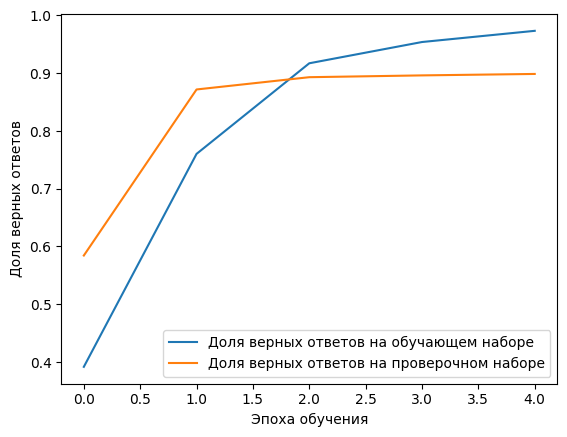

In [67]:
plt.plot(history_cnn.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_cnn.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Далее протестируем нашу нейросеть на данных, не пересекающихся с данными для тренировки нейросети, для этого для начала загрузим файл с тестовыми данными:

In [68]:
test = pd.read_csv('test.csv',
                    sep = ';',
                    header=None, 
                    names=['text', 'class'])

In [69]:
test

,text,class
0,im feeling rather rotten so im not very ambiti...,1
1,im updating my blog because i feel shitty,1
2,i never make her separate from me because i do...,1
3,i left with my bouquet of red and yellow tulip...,2
4,i was feeling a little vain when i did this one,1
...,...,...
1995,i just keep feeling like someone is being unki...,4
1996,im feeling a little cranky negative after this...,4
1997,i feel that i am useful to my people and that ...,2
1998,im feeling more comfortable with derby i feel ...,2


In [70]:
test_sequences = tokenizer.texts_to_sequences(test['text'])
x_test = pad_sequences(test_sequences, maxlen=max_messages_len)

In [71]:
x_test[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,   16,    7,  202,
         714,   14,   16,   25,   45, 5594,  113,   57],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,   16,   10,  242,   36,    1,    2,  468],
       [   0,    0,    0,    0,    0,    0,    0,    0,    1,  144,   79,
          67, 2970,   59,   17,   36,    1,  103,   42,  164,   66,   67,
           4,    2,   13,    1,   92,  405,   24,   67],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           1,  171,   24,   10,    9,  872,    3, 5365,  735,   10, 1517,
           7,  350,   37,  607,   94,   33,    1, 1972],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    1,   19,    7,
           6,   55,  653,   33, 

In [72]:
y_test = utils.to_categorical(test['class'] - 1, nb_classes)

In [73]:
y_test

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [74]:
model_cnn.load_weights(model_cnn_save_path)

Далее проверим насколько точно модель справится с классификацией сообщений из тестового набора данных:

In [75]:
model_cnn.evaluate(x_test, y_test, verbose=1)

63/63 [==============================] - 0s 2ms/step - loss: 0.3271 - accuracy: 0.8995


[0.3270876407623291, 0.8995000123977661]

Как видно, доля правильных ответов равна 0.8995(89,95%), что вполне неплохо.

Далее проверим работу созданной модели, подавая ей на вход произвольный текст

In [89]:
text = 'i feel incredibly lucky just to be able to talk to her'
sequence = tokenizer.texts_to_sequences([text])


In [90]:
sequence

[[1, 2, 13, 1, 23, 71, 252, 32, 6, 617, 2742, 617, 1417, 9, 1103]]

In [91]:
data = pad_sequences(sequence, maxlen = max_messages_len)


In [92]:
data

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    1,    2,   13,    1,   23,   71,  252,
          32,    6,  617, 2742,  617, 1417,    9, 1103]])

In [93]:
result = model_cnn.predict(data)

1/1 [==============================] - 0s 139ms/step


In [94]:
result

array([[9.9939275e-01, 1.0544360e-06, 1.4106730e-07, 4.6529871e-04,
        1.4077683e-04, 3.2404103e-08]], dtype=float32)

В качестве выходных данных выдается массив с 6 числами, каждая из которых является вероятностью, что входное сообщение относится к соответствующему классу:

In [95]:
predicted_value = result.argmax()
predicted_value
def show_result(predicted_value):
    if predicted_value == 0:
        return 'sadness'
    if predicted_value == 1:
        return 'joy'
    if predicted_value == 2:
        return 'love'
    if predicted_value == 3:
        return 'anger'
    if predicted_value == 4:
        return 'fear'
    if predicted_value == 5:
        return 'surprise'
    return 'neutral'

Результат можно увидеть ниже:

In [96]:
show_result(predicted_value)


'sadness'

Далее загрузим полученную модель, сохраненную в файле best_model_cnn.h5 и проверим ее работу с теми же входными данными, должна загрузиться модель, полностью идентичная созданной ранее.

In [85]:
from keras.models import load_model

In [86]:
loaded_model = load_model('best_model_cnn.h5')

In [87]:
test_result=loaded_model.predict(data)
new_predicted_value = test_result.argmax()
new_predicted_value

1/1 [==============================] - 0s 155ms/step


5

In [88]:
show_result(new_predicted_value)

'surprise'

Как видно, загруженная модель работает